In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Supply-demand curves & Spot price

In [3]:
np.random.seed(124)
x_range = np.arange(100)
supply = np.cumsum(np.random.rand((100))*np.random.choice([0, 1, 2, 10, 30], size=100, p=[0.6, 0.1, 0.1, 0.1, 0.1]))
demand = np.cumsum(np.random.rand((100))*np.random.choice([0, 1, 2, 10, 30], size=100, p=[0.6, 0.1, 0.1, 0.1, 0.1]))[::-1]

In [4]:
s_d = pd.DataFrame({"supply": supply, "demand": demand})

In [6]:
s_d[s_d["demand"] <= s_d["supply"]].iloc[:5]

,supply,demand
53,116.987082,105.103416
54,116.987082,105.103416
55,116.987082,103.048316
56,118.584785,103.048316
57,118.584785,103.048316


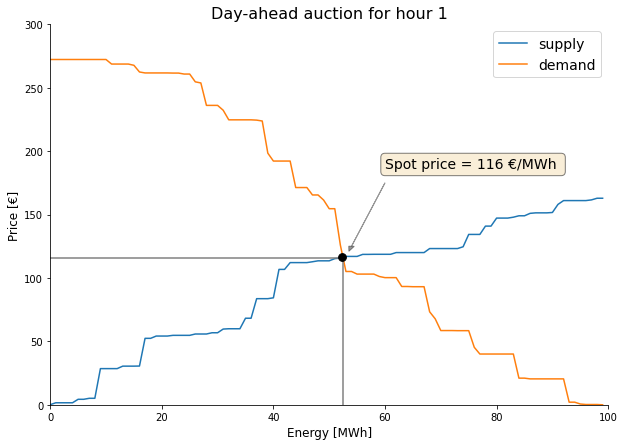

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(x_range, supply, label="supply", zorder=1)
ax.plot(x_range, demand, label="demand", zorder=1)
ax.axvline(x=52.4, color="grey", alpha=1, ymax=0.385, zorder=1)
ax.axhline(y=116, color="grey", alpha=1, xmax=0.52, zorder=1)
ax.scatter(x=52.375, y=116.2, label=None, zorder=2, color="black", marker="o", s=60)


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.6, 0.65, "Spot price = 116 €/MWh ", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.arrow(60, 175, -6, -50, head_width=1, head_length=4, fc='k', ec='k', alpha=0.4)


ax.set_ylim(0, 300)
ax.set_xlim(0, 100)

ax.set_xlabel("Energy [MWh]", fontsize=12)
ax.set_ylabel("Price [€]", fontsize=12)
ax.set_title("Day-ahead auction for hour 1", fontsize=16)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(prop={"size": 14})
fig.savefig("figures/hourly_auction.pdf")

### Spot price timeseries

In [14]:
df = pd.read_csv("day_ahead_market_20211005.csv")
df["spain"] = df["spain"].round(decimals=2)

In [15]:
ts_index = (pd.to_datetime(df["date"]) + pd.to_timedelta(df["hour"] - 1, unit="H"))
ts_df = pd.DataFrame(index=ts_index, data=df["spain"].values)

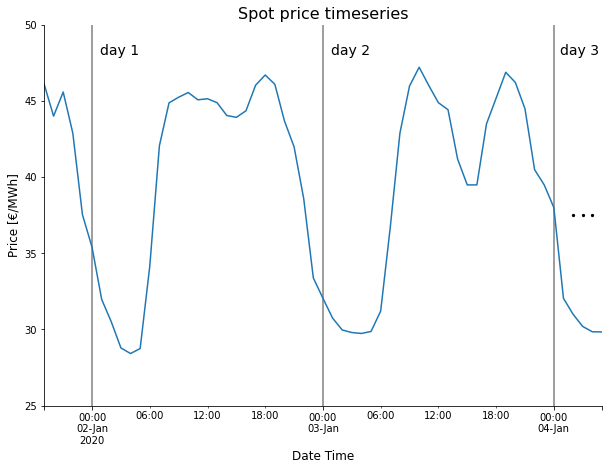

In [143]:
fig, ax = plt.subplots(figsize=(10, 7))

ts_df.iloc[-15436:-15377].plot(ax=ax,ls="-", legend=False, zorder=2)
for i in range(1, 4):
    ax.axvline(x=ax.get_xticks()[i], zorder=1, color="grey", alpha=1)
    
ax.text(0.1, 0.95, "day 1", transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

ax.text(0.515, 0.95, "day 2", transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

ax.text(0.925, 0.95, "day 3", transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

#ax.text(0.975, 0.5, "...", transform=ax.transAxes, fontsize=24, verticalalignment='top')

ax.scatter(x=[ax.get_xticks()[-2] + i for i in range(2, 5)], 
           y=[ax.get_yticks()[len(ax.get_yticks())//2]]*3, color="k", s=5)


ax.set_ylim(25, 50)

ax.set_xlabel("Date Time", fontsize=12)
ax.set_ylabel("Price [€/MWh]", fontsize=12)
ax.set_title("Spot price timeseries", fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.savefig("figures/spot_price_ts.pdf")